In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the data from database in "output" directory

These are data paths to the maps. Again, ns-maps are "no-signal maps" and ws-maps are "with signal maps". The get_data(l) function loads the 0th to the lth map in the ns-maps directory and in the ws-maps directory. It then associates 0's with the samples from the ns-maps directory and 1's with the samples fromthe ws-maps directory.

Note that the shape is as follows: (samples, features), so that if we have (10,200), it means we have 10 samples with 200 features. Here, we have a total of 200 samples, 100 of both ns-maps and ws-maps. The features are the pixel values, and since we have 400x400, there are 160000 features.

get_data(l) should then output X,y where X.shape = (2*l, 160000) and y.shape = (2*l,). 

In [2]:
data_path_ns = "../data/ns-maps/"
data_path_ws = "../data/ws-maps/"

In [3]:
def get_data(l):
    arr1 = np.array([np.load(data_path_ns + "ns-map"+str(i)+".npy").flatten() for i in range(l)])
    arr2 = np.array([np.load(data_path_ws + "ws-map"+str(i)+".npy").flatten() for i in range(l)])
    y = np.append(np.zeros(l), np.ones(l))
        
    
    return np.concatenate((arr1,arr2),axis=0), y

In [4]:
X,y = get_data(80)

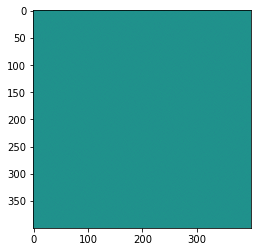

In [5]:
plt.imshow(X[0].reshape(400,400))

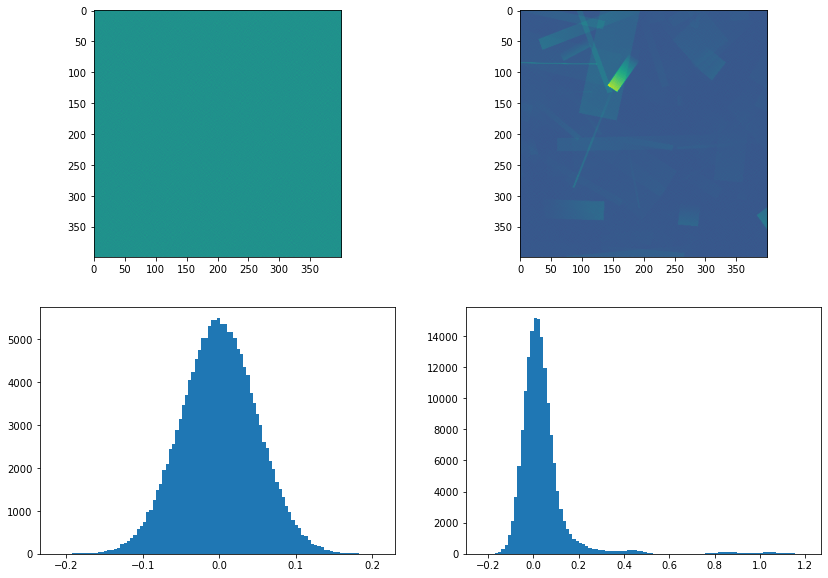

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes[0,0].imshow(X[0].reshape(400,400))
axes[0,1].imshow(X[-2].reshape(400,400))
_=axes[1,0].hist(X[0], bins=100)
_=axes[1,1].hist(X[-1], bins=100)

### Applying machine learning

We split the data into train and test, as it shuffles our data and also allows a test set to find out accuracy.

Then, we can use logistic regression to fit our data, and we can test the accuracy of this classifier.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [24]:
coefficients = logreg.coef_.reshape(-1)
intercept = logreg.intercept_[0]

In [10]:
logreg.score(X_test, y_test)

0.95

We make a classification report for the test data:

In [57]:
print(classification_report(y_test, logreg.predict(X_test), target_names=['no signal', 'with signal']))

              precision    recall  f1-score   support

   no signal       0.92      1.00      0.96        22
 with signal       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



We make a classification report for the train data:

In [58]:
print(classification_report(y_train, logreg.predict(X_train), target_names=['no signal', 'with signal']))

              precision    recall  f1-score   support

   no signal       1.00      1.00      1.00        58
 with signal       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



We can then observe what kind of maps the algorithm was/wasn't able to classify.

[1.]


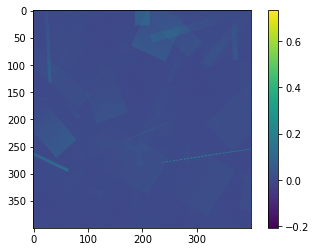

In [11]:
i = 95 #number between 80-99 (since these are the test maps)
m = np.load(data_path_ws + "ws-map"+str(i)+".npy")
plt.imshow(m)
plt.colorbar()
print(logreg.predict(m.reshape(1,-1)))


### Understanding the predictive power

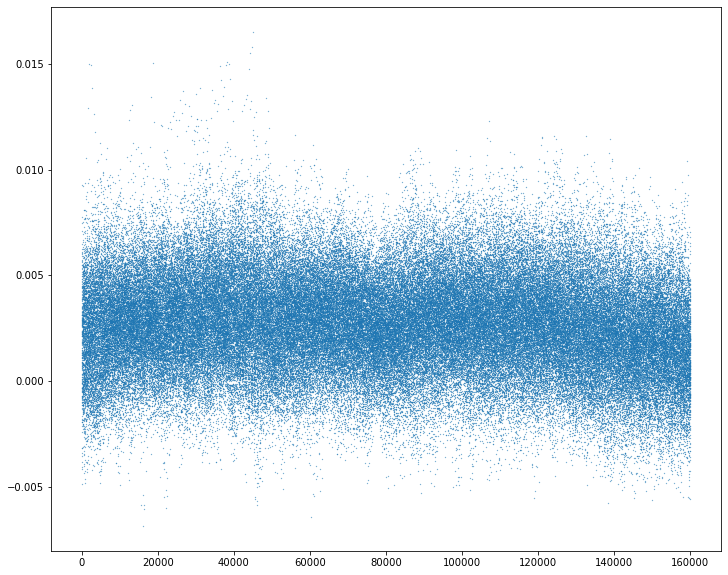

In [13]:
plt.figure(figsize=(12,10))
plt.plot(np.arange(coefficients.size), coefficients, '.', markersize=0.5)

In [12]:
logreg.coef_

array([[ 0.0001431 ,  0.00013277,  0.00406948, ..., -0.00024718,
         0.00014798,  0.00128558]])

In [13]:
logreg.intercept_

array([-4.57545657])

### Useful functions

In [16]:
logreg.decision_function(X_test) #this is just X*coefficients + intercept, where X is a 400x400 map of size (1,400^2)

array([-4.998918  , -4.96540999, 10.86273125, -4.63201593, -4.60316626,
        0.56760679, -4.57797064,  3.58821787,  2.43073038, -4.44608319,
       -4.63765338,  3.45544283, -4.83731084,  4.51782678, -4.68024784,
        5.09236272, 20.27511742, -5.03496044, -4.3886395 , -4.54877473,
       -4.20455079, 26.57057346, -4.31450024, -4.49122267, -4.35239577,
       -4.20104502,  1.05059944,  6.10686493, 13.33154208,  1.96988466,
       -4.54287953, -5.05928986, -4.38902702,  2.47693488, -0.88426603,
       -4.64049401,  6.27460313, 18.4537373 , -4.70883238, -0.770694  ])

In [44]:
logreg.predict_proba(X_test) #First column - prob that is contains no signal, second col - prob that there is a signal.

array([[9.93299952e-01, 6.70004796e-03],
       [9.93073225e-01, 6.92677549e-03],
       [1.91587618e-05, 9.99980841e-01],
       [9.90358745e-01, 9.64125526e-03],
       [9.90079346e-01, 9.92065378e-03],
       [3.61789229e-01, 6.38210771e-01],
       [9.89828788e-01, 1.01712117e-02],
       [2.69037354e-02, 9.73096265e-01],
       [8.08591677e-02, 9.19140832e-01],
       [9.88411469e-01, 1.15885309e-02],
       [9.90412424e-01, 9.58757579e-03],
       [3.06069565e-02, 9.69393044e-01],
       [9.92134018e-01, 7.86598179e-03],
       [1.07949119e-02, 9.89205088e-01],
       [9.90808552e-01, 9.19144801e-03],
       [6.10597541e-03, 9.93894025e-01],
       [1.56541091e-09, 9.99999998e-01],
       [9.93535605e-01, 6.46439519e-03],
       [9.87734694e-01, 1.22653061e-02],
       [9.89530608e-01, 1.04693921e-02],
       [9.85292062e-01, 1.47079376e-02],
       [2.88769009e-12, 1.00000000e+00],
       [9.86803252e-01, 1.31967480e-02],
       [9.88917270e-01, 1.10827296e-02],
       [9.872877